In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip '/content/drive/MyDrive/CS_Challenge/thin/Input_data.zip/Input_data.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: Input_data/thm_dir_N00_330_95.png  
 extracting: Input_data/thm_dir_N00_330_81.png  
 extracting: Input_data/thm_dir_N00_330_97.png  
 extracting: Input_data/thm_dir_N00_330_9.png  
 extracting: Input_data/thm_dir_N00_330_75.png  
 extracting: Input_data/thm_dir_N00_330_8.png  
 extracting: Input_data/thm_dir_N00_330_98.png  
 extracting: Input_data/thm_dir_N00_330_73.png  
 extracting: Input_data/thm_dir_N00_330_93.png  
 extracting: Input_data/thm_dir_N00_330_68.png  
 extracting: Input_data/thm_dir_N00_330_85.png  
 extracting: Input_data/thm_dir_N00_330_60.png  
 extracting: Input_data/thm_dir_N00_330_78.png  
 extracting: Input_data/thm_dir_N00_330_54.png  
 extracting: Input_data/thm_dir_N00_330_94.png  
 extracting: Input_data/thm_dir_N00_330_87.png  
 extracting: Input_data/thm_dir_N00_330_67.png  
 extracting: Input_data/thm_dir_N00_330_86.png  
 extracting: Input_data/thm_dir_N00_330_84

In [ ]:
!unzip '/content/drive/MyDrive/CS_Challenge/thin/output filled data.zip'

Archive:  /content/drive/MyDrive/data/output filled data.zip
   creating: output filled data/
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_0.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_1.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_10.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_100.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_101.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_102.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_103.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_104.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_105.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2_32_km_segrng_106.png  
  inflating: output filled data/thm_dir_N-30_000_-30_0_0_30_2

In [ ]:
import glob
import os 
removing_files = glob.glob('/content/Input_data/thm_dir_N30_000_*.png')
for i in removing_files:
    os.remove(i)

In [ ]:
import glob
import os 
removing_files = glob.glob('/content/Input_data/thm_dir_N30_030_*.png')
for i in removing_files:
    os.remove(i)

In [ ]:
  import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from PIL import Image
from glob import glob
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
from PIL import Image


In [ ]:
import pandas as pd
def load_img_path(folder):
    L=[]
    for filename in os.listdir(folder) :
        L.append(os.path.join(folder,filename))
    return L

test = []
input_image = load_img_path('Input_data')
output_thin = load_img_path('output thin data')

for i in range(len(output_thin)):
        if output_thin[i][output_thin[i].index('N')+1] == '-' :
            nom=output_thin[i][output_thin[i].index('N'):output_thin[i].index('N')+8]
        else :            
            nom=output_thin[i][output_thin[i].index('N'):output_thin[i].index('N')+7]
        id_image_last_caracter=output_thin[i].index('.png')
        id_image_first_caracter=len(output_thin[i])-output_thin[i][::-1].index('_')
        ch='Input_data/'+'thm_dir_'+nom+'_'+str(output_thin[i][id_image_first_caracter:id_image_last_caracter])+'.png'
        test.append(ch)

In [ ]:
NameI = []
for i in range(len(input_image)):
        if input_image[i][input_image[i].index('N')+1] == '-' :
            nom=input_image[i][input_image[i].index('N'):input_image[i].index('N')+8]
        else :            
            nom=input_image[i][input_image[i].index('N'):input_image[i].index('N')+7]
        NameI.append(nom)

In [ ]:
len(output_thin)

4950

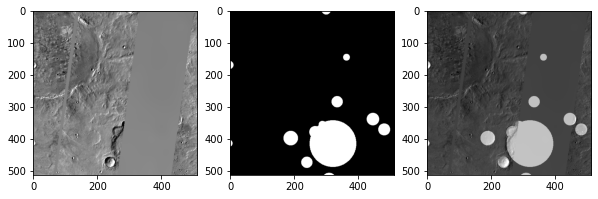

In [ ]:
data=[]
for i in range(4950) :
    data.append([test[i],output_thin[i]])
df=pd.DataFrame(data,columns=['input_image','output_thin'])
N=210
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
img=cv2.imread(df.input_image.iloc[N])
plt.imshow(img)
plt.subplot(1,3,2)
msk=cv2.imread(df.output_thin.iloc[N])
plt.imshow(msk)
plt.subplot(1,3,3)
plt.imshow(img)
plt.imshow(msk,alpha=0.5)

In [ ]:
data_train,data_test=train_test_split(df,test_size=0.1)

data_train,data_val=train_test_split(data_train,test_size=0.2)
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,zoom_range=0.2
)
datagenM = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2
)



image_train=datagen.flow_from_dataframe(data_train,  
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="input_image", 
                                    batch_size=32,
                                    class_mode=None
                                    
)
mask_train=datagenM.flow_from_dataframe(data_train, 
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="output_thin", 
                                    batch_size=32,
                                    class_mode=None
)
image_validation=datagen.flow_from_dataframe(data_val,  
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="input_image", 
                                    batch_size=32,
                                    class_mode=None
)

mask_validation=datagenM.flow_from_dataframe(data_val, 
                                    target_size=(256,256), 
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="output_thin", 
                                    batch_size=32,
                                    class_mode=None
)
train_gen=zip(image_train,mask_train)
valid_gen=zip(image_validation,mask_validation)



Found 3564 validated image filenames.
Found 3564 validated image filenames.
Found 891 validated image filenames.
Found 891 validated image filenames.


Text(0.5, 1.0, 'image')

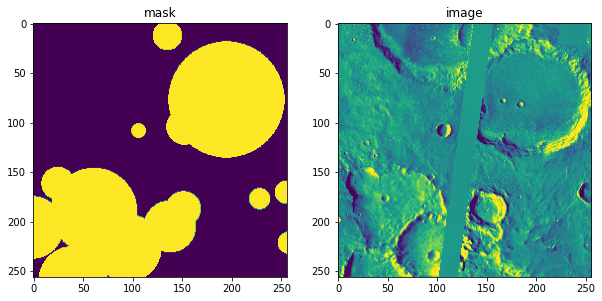

In [ ]:
img=mask_train
img1=image_train
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img[0][0][:,:,0])
plt.title('mask')

plt.subplot(1,2,2)
plt.imshow(np.squeeze(img1[0][0][:,:,0]))

plt.title('image')



In [ ]:
import os
import sys

from keras.models import Model, load_model
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.layers import Concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from keras import backend as K
from keras import optimizers
from keras import metrics
import datetime
import glob
import random
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt
def unet1(): 
    ACT = 'relu'
    KERN_SIZE = 3
    FILTERS=[16,24,32,48,64,96,128,128]
    
    z1 = Input(shape=(256,256,1))
    print('z1: {}'.format(z1.shape))

    z2 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(z1)
    p2 = AveragePooling2D(pool_size=2)(z2)
    print('z2: {}, \np2: {}'.format(z2.shape, p2.shape))

    z3 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(p2)
    p3 = AveragePooling2D(pool_size=2)(z3)
    print('z3: {}, \np3: {}'.format(z3.shape, p3.shape))

    z4 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(p3)
    d4 = Dropout(0.2)(z4)
    p4 = AveragePooling2D(pool_size=2)(d4)
    print('z4: {}, \np4: {}'.format(z4.shape, p4.shape))

    z5 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation=ACT)(p4)
    d5 = Dropout(0.2)(z5)
    p5 = AveragePooling2D(pool_size=2)(d5)
    print('z5: {}'.format(z5.shape))

    z6 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(p5)
    d6 = Dropout(0.3)(z6)
    p6 = AveragePooling2D(pool_size=2)(d6)

    z7 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(p6)
    d7 = Dropout(0.4)(z7)
    p7 = AveragePooling2D(pool_size=2)(d7)

    z8 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(p7)
    d8 = Dropout(0.5)(z8)
    p8 = AveragePooling2D(pool_size=2)(d8)

    z9 = Conv2D(FILTERS[7], KERN_SIZE, padding='same', activation=ACT)(p8)
    d9 = Dropout(0.5)(z9)

    u9 = UpSampling2D(size=2)(d9)
    q9 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(u9)
    d9b = Dropout(0.5)(q9)
    a9 = Concatenate()([d9b,z8])

    u8 = UpSampling2D(size=2)(a9)
    q8 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(u8)
    d8b = Dropout(0.4)(q8)
    a8 = Concatenate()([d8b,z7])

    u7 = UpSampling2D(size=2)(a8)
    q7 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(u7)
    d7b = Dropout(0.3)(q7)
    a7 = Concatenate()([d7b,z6])

    u6 = UpSampling2D(size=2)(a7)
    q6 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation='relu')(u6)
    d6b = Dropout(0.2)(q6)
    a6 = Concatenate()([d6b,z5])

    u5 = UpSampling2D(size=2)(a6)
    q5 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(u5)
    d5b = Dropout(0.2)(q5)
    a5 = Concatenate()([d5b,z4])

    u4 = UpSampling2D(size=2)(a5)
    q4 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(u4)
    a4 = Concatenate()([q4,z3])

    u3 = UpSampling2D(size=2)(a4)
    q3 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(u3)
    a3 = Concatenate()([q3,z2])

    z_final = Conv2D(1, KERN_SIZE, padding='same', activation='sigmoid')(a3)
    #z8 activation = sigmoid or softmax

    return Model(inputs = z1, outputs = z_final)

In [ ]:
model = unet1()
# tf.keras.optimizers.Adam(lr=1e-2)
model.compile( optimizer='adam' , loss = 'binary_crossentropy', metrics=['acc'])

z1: (None, None, None, 1)
z2: (None, None, None, 16), 
p2: (None, None, None, 16)
z3: (None, None, None, 24), 
p3: (None, None, None, 24)
z4: (None, None, None, 32), 
p4: (None, None, None, 32)
z5: (None, None, None, 48)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss',patience=10)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("unet1_thin_bs32_ep50.hdf5", monitor='val_loss', verbose=1,
save_best_only=True, mode='auto', period=1)
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50,
    batch_size= 32,
    validation_steps=len(data_val) //32,
    steps_per_epoch=len(data_train) //32,
    callbacks=[checkpoint,tensorboard_callback]
)

Epoch 1/50
891/891 [==============================] - ETA: 0s - loss: 0.3551 - acc: 0.9076  - ETA: 2:25 - loss: 0.5724 - acc: 0.89 - ETA: 2:25 - loss: 0.5696 - acc: 0.8 - ETA: 2:24 - loss: 0.5655 - acc: 0. - ETA: 2:23 - loss: 0.5600 -  - ETA: 2:21 - loss: 0.5436 - acc: - ETA:  - ETA: 2:03 - l - ET - ETA: 1:43 - loss: 0.4 - ETA: 1:40 - loss: 0.4229 - a - ETA: 1:38 - loss: 0.4 - ETA: 1:34 - loss: 0.4158 - acc: 0. - ETA: 1:33 - loss: 0.41 - ETA: 1:30 - loss: 0.4109 - - ETA: - ETA: 1:22 - loss: 0.4007 - acc: 0 - ETA: 1:21 - loss: 0.3997 - acc: 0.
Epoch 00001: val_loss improved from inf to 0.29527, saving model to best_model_unet2_bs4_kernel7.hdf5
891/891 [==============================] - 219s 239ms/step - loss: 0.3551 - acc: 0.9076 - val_loss: 0.2953 - val_acc: 0.9181
Epoch 2/50
891/891 [==============================] - ETA: 0s - loss: 0.2970 - acc: 0.9130  - ETA: 1:33 - loss: 0.3006 - acc: 0 - ETA: 1:3 - ETA: 1:27 - loss: 0.30 - E - ETA: 1s - loss: 0.2974 - acc
Epoch 00002: val_loss imp

In [ ]:
model.save('unet1_thin_bs32_ep50')

INFO:tensorflow:Assets written to: best_model_unet2_bs4_kernel7\assets


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [ ]:
model = keras.models.load_model('unet1_thin_bs32_ep50.hdf5')


1/1 [==============================] - 9s 9s/step


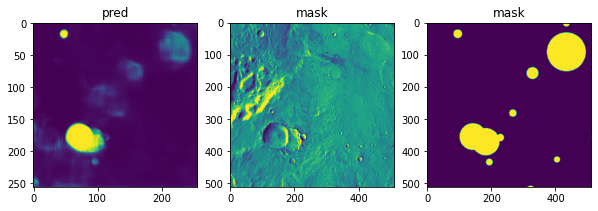

1/1 [==============================] - 0s 25ms/step


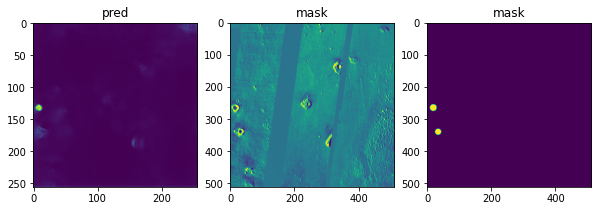

1/1 [==============================] - 0s 18ms/step


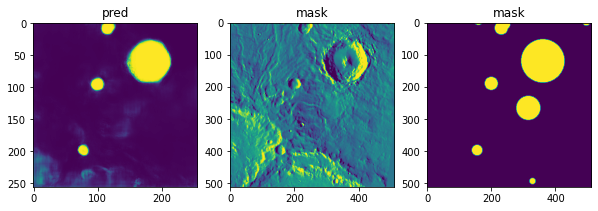

1/1 [==============================] - 0s 18ms/step


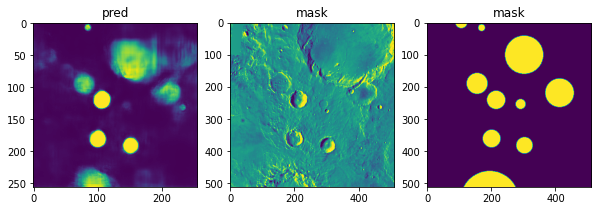

1/1 [==============================] - 0s 19ms/step


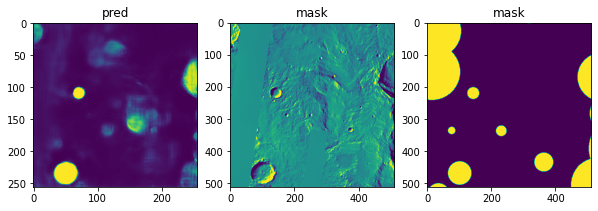

1/1 [==============================] - 0s 18ms/step


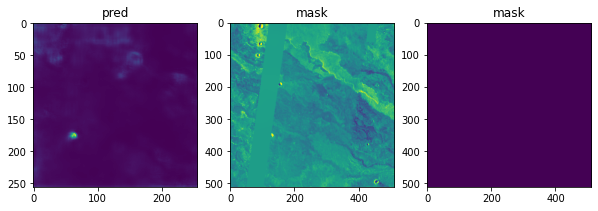

1/1 [==============================] - 0s 29ms/step


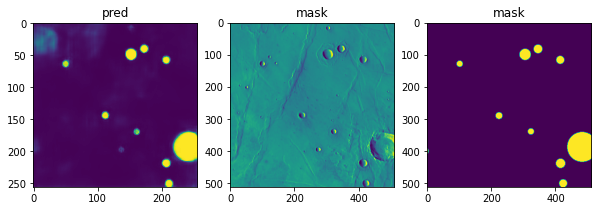

1/1 [==============================] - 0s 20ms/step


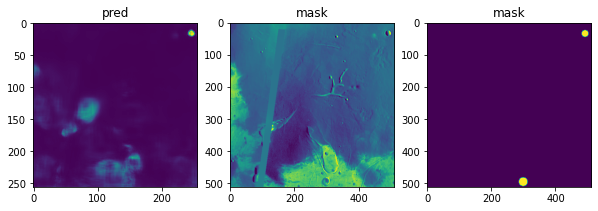

1/1 [==============================] - 0s 20ms/step


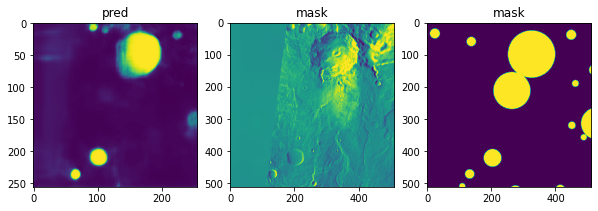

1/1 [==============================] - 0s 20ms/step


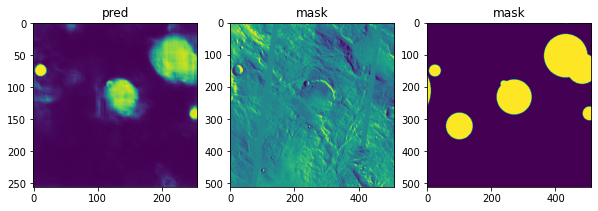

1/1 [==============================] - 0s 19ms/step


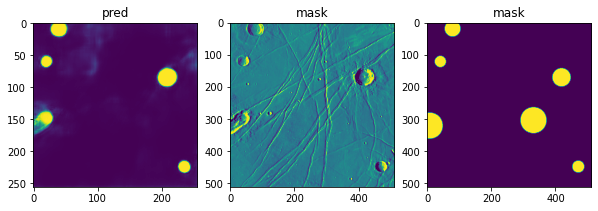

1/1 [==============================] - 0s 18ms/step


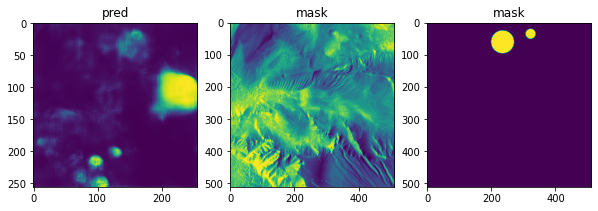

1/1 [==============================] - 0s 18ms/step


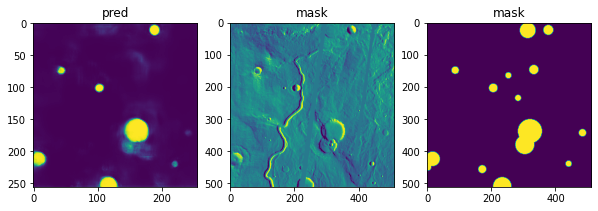

1/1 [==============================] - 0s 20ms/step


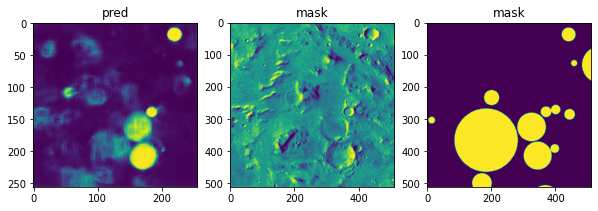

1/1 [==============================] - 0s 18ms/step


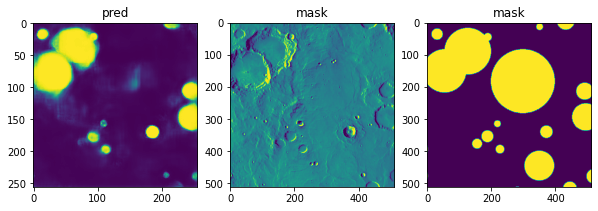

1/1 [==============================] - 0s 18ms/step


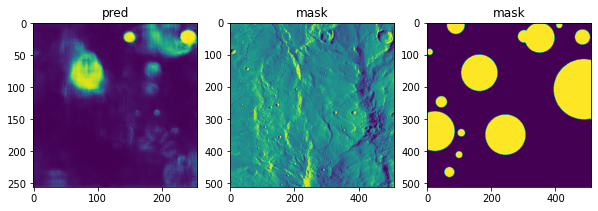

1/1 [==============================] - 0s 26ms/step


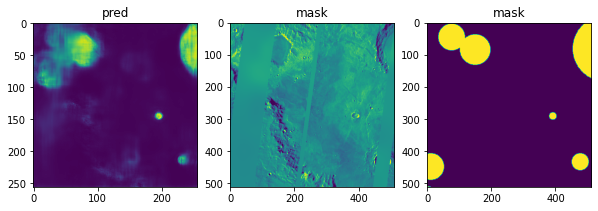

1/1 [==============================] - 0s 25ms/step


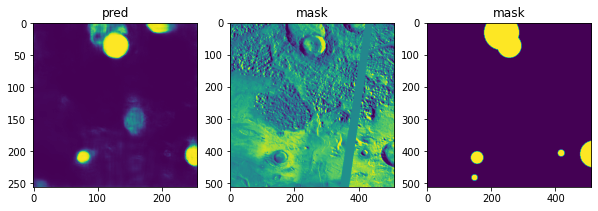

1/1 [==============================] - 0s 19ms/step


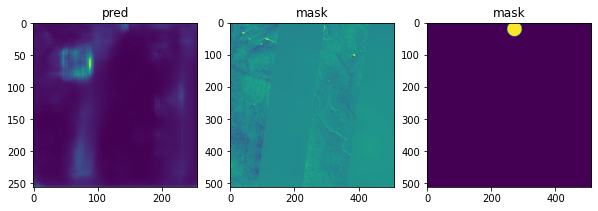

1/1 [==============================] - 0s 19ms/step


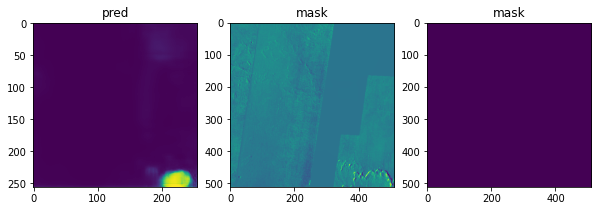

In [ ]:
import cv2
import numpy as np
for i in range(20):
    n=0
    # creating an og_image object
    img = cv2.imread(data_test['input_image'].iloc[i])
    img= cv2.resize(img[:,:,2:3],(256, 256))
    img= img[np.newaxis,:]
    img = img.reshape((1,256,256,1))    
    pred=model.predict(img)

    plt.figure(figsize=(10,10))
    plt.subplot(1,3,n+1)
    plt.title('pred')
    plt.imshow(np.squeeze(pred[0,:,:,0]))

    plt.subplot(1,3,n+2)
    plt.title('mask')
    inp = cv2.imread(data_test['input_image'].iloc[i]) 
    plt.imshow(np.squeeze(inp[:,:,1:2]))


    plt.subplot(1,3,n+3)
    plt.title('mask')
    mask = cv2.imread(data_test['output_thin'].iloc[i]) 
    plt.imshow(np.squeeze(mask[:,:,1:2]))


  
    plt.show()

Creater detection 

In [ ]:
model5 = keras.models.load_model('model_thin_unet1_btchsize2_lr0.01')
